In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lmfit as lm
import scipy.special as sf
from scipy.stats import norm

In [13]:
# the plan is to simulate intensity distribution by using a Poisson distribution
# over a small area.  The first thing that we have to figure out is over which length
# a normal distribution will be non-zero given double resolution
w = 1 # is the way the Gaussian width is defined in optics
sigma = w/2
ep = 1.0
x = np.linspace(-20,20,200)
intensity = ep*sigma*np.sqrt(2*np.pi)*norm.pdf(x, loc=0,scale=sigma)
#print(intensity)
print(x[1],x[-2])

[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 8.65603012e-321 4.02924190e-314 1.59523037e-307 5.37324006e-301
 1.53979123e-294 3.75405133e-288 7.78666223e-282 1.37409016e-275
 2.06296515e-269 2.63500423e-263 2.86340980e-257 2.64727136e-251
 2.08221793e-245 1.39337068e-239 7.93267972e-234 3.84225281e-228
 1.58330549e-222 5.55080876e-217 1.65561967e-211 4.20124158e-206
 9.07000439e-201 1.66590451e-195 2.60318767e-190 3.46077701e-185
 3.91430372e-180 3.76658861e-175 3.08357576e-170 2.14770101e-165
 1.27264064e-160 6.41579555e-156 2.75174389e-151 1.00410302e-146
 3.11717580e-142 8.23298051e-138 1.84997408e-133 3.53660832e-129
 5.75202878e-125 7.95917222e-121 9.36973954e-117 9.38425716e-113
 7.99622577e-109 5.79672850e-105 3.57514481e-101 1.87593195e-097
 8.37439205e-094 3.18055026e-090 1.02769443e-086 2.82513044e-083
 6.60732659e-080 1.31469741e-076 2.22555641e-073 3.20526670e-070
 3.92737618e-067 4.09405429e-064 3.63092650e-061 2.73964369e-058
 1.75866643e-055 9.604740

In [10]:
# set limits and define the length of the box
xlim1 = x[1]
xlim2 = x[-2]
L = xlim2-xlim1
print(L)

39.59798994974875


In [75]:
# we want a certain number of particles per length
# for a particular w which represents an effective size of sqrt(pi)/2*w
N_avg = 0.1
N_avg_L = N_avg*L/np.sqrt(np.pi)*np.sqrt(2)/w
print(N_avg_L)

3.1594624819731565


In [76]:
N_samples = 1000000
N_draws = np.random.poisson(N_avg_L,N_samples)
int_list = [np.sum(ep*sigma*np.sqrt(2*np.pi)*
                   norm.pdf(xlim1 + L*np.random.random(n), loc=0,scale=sigma))
                  for n in N_draws]
int_list = np.array(int_list)

(0, 15)

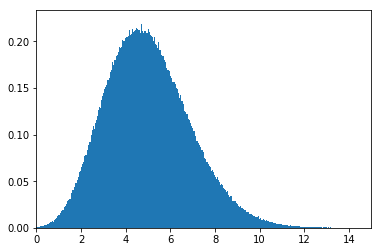

In [74]:
_ = plt.hist(int_list,bins=500,density=True)
#plt.ylim((0,1))
plt.xlim((0,15))

In [73]:
int_list.mean()

4.999170387817737

In [77]:
int_list.min()

0.0